In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings

In [10]:
!pip install catboost

In [11]:
df=pd.read_csv("/content/StudentsPerformance.csv")

In [12]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


## Preparing X and Y variable.

In [13]:
X=df.drop(columns=['math score'],axis=1)

In [14]:
X.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [15]:
X.shape

(1000, 7)

In [16]:
Y=df['math score']

In [17]:
Y.head(2)

,math score
0,72
1,69


In [18]:
Y.shape

(1000,)

In [19]:
## types of categories in gender column
print("cateogires in 'gender' variable:    " ,end=" ")
print(df['gender'].unique())
## types of categories in race/ethnicity column
print("cateogires in 'race/ethnicity' variable:    " ,end=" ")
print(df['race/ethnicity'].unique())
## types of categories in paarental level of education column
print("cateogires in 'parental level of education' variable:    " ,end=" ")
print(df['parental level of education'].unique())
## types of categories in lunch column
print("cateogires in 'lunch' variable:    " ,end=" ")
print(df['lunch'].unique())
## types of categories in test preparation course column
print("cateogires in 'test preparation course' variable:    " ,end=" ")
print(df['test preparation course'].unique())

cateogires in 'gender' variable:     ['female' 'male']
cateogires in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
cateogires in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
cateogires in 'lunch' variable:     ['standard' 'free/reduced']
cateogires in 'test preparation course' variable:     ['none' 'completed']


In [20]:
## create column transformer with 3 types of transformer.

## onehotencoder is applied on categorical features
## standardscalar is applied on numerical features

num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("onehotencoder",oh_transformer,cat_features),
        ("standardscaler",numeric_transformer,num_features)
    ]
)

In [21]:
## fitted the preprocessor on X features.
# Re-create X as a DataFrame to ensure the preprocessor works correctly
X = df.drop(columns=['math score'],axis=1)
# Apply the preprocessor and update X with the transformed numpy array
X = preprocessor.fit_transform(X)

In [22]:
X


array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [23]:
# sperate dataset into test and train .
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

## create an evaluate function to give all metrics after model training .

In [24]:
def evaluate_model(true,predicted):
  mae=mean_absolute_error(true,predicted)
  mse=mean_squared_error(true,predicted)
  rmse=np.sqrt(mean_squared_error(true,predicted))
  r2_square=r2_score(true,predicted)
  return mae,rmse,r2_square

In [25]:
models={
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'CatBoosting Regressor':CatBoostRegressor(verbose=False),
    'XGBRegressor':XGBRegressor(),
    'AdaBoost Regressor':AdaBoostRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'Decision Tree Regressor':DecisionTreeRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_train) # train model

  # make prediction
  y_train_pred=model.predict(x_train)
  y_test_pred=model.predict(x_test)

  #evaluate train and test dataset
  model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
  model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print(" - R2 score: {:.4f}".format(model_train_r2))

  print('----------------------------------')

  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print(" - R2 score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
 - R2 score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
 - R2 score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
 - R2 score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
 - R2 score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
 - R2 score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
 - R2 score: 0.8806


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 3.0427
- Mean Absolute Error: 2.4054
 - R2 score: 0.9589
----------------

In [27]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model name','R2 score']).sort_values(by=['R2 score'],ascending=False)

,model name,R2 score
2,Ridge,0.880593
0,Linear Regression,0.880433
6,Random Forest Regressor,0.853963
3,CatBoosting Regressor,0.851632
5,AdaBoost Regressor,0.841506
4,XGBRegressor,0.827797
1,Lasso,0.825320
7,K-Neighbors Regressor,0.782192
8,Decision Tree Regressor,0.755197


## Linear regression


In [28]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print(" Accuracy of this model is %.2f" %score)

 Accuracy of this model is 88.04


## Plot y_pred and y_test

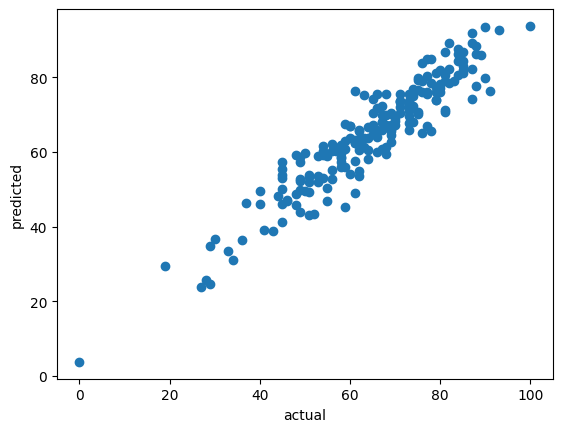

In [30]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual");
plt.ylabel("predicted");


<Axes: xlabel='math score'>

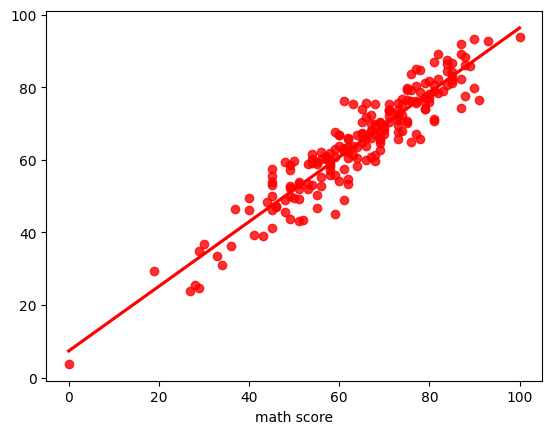

In [32]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

##Difference between actual and predicted values.

In [33]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
